# Customizing Visualizations

Before we go into more details on how to construct
complex visualizations, let us explain how one can customize the plots generated by Vizagrams specification.

In [1]:
using Pkg
Pkg.activate("../.")
using Vizagrams
using DataFrames
using Statistics
using Random
using VegaDatasets
df = DataFrame(dataset("cars"));

# We need to drop missing values, as Vizagrams does not handle them yet.
df = dropmissing(df);

  Activating project at `~/Documents/GitHub/CTViz_Workshop/Notebooks`


When creating a plot in Vizagrams, many defaults are guessed in order to make the specification less verbose.
Yet, if one wishes, it is possible to alter such deafults in order to produce custom visuals. 

## 1. Legends
When visualizations become more complex, so does their legends. Consider, for example, the scatter plot
with faces as marks.

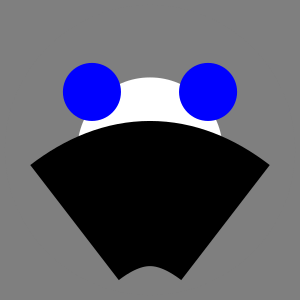

In [7]:
Face()

draw(Face(smile=-1))

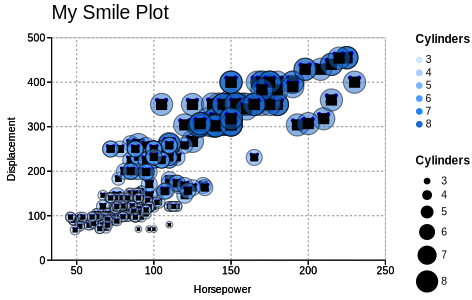

In [31]:
d = Plot(
    title="My Smile Plot",
    data = df,
    x = :Horsepower,
    y = :Displacement,
    color = :Cylinders,
    size = :Cylinders,
    smile = (field = :Cylinders, scale_range=(-1,1)),
    
    graphic= ∑() do row
        T(row[:x],row[:y])U(row[:size])*(
            Face(headstyle=S(:fill=>row[:color]),smile=row[:smile])+
            Square())
    end
)

draw(d)

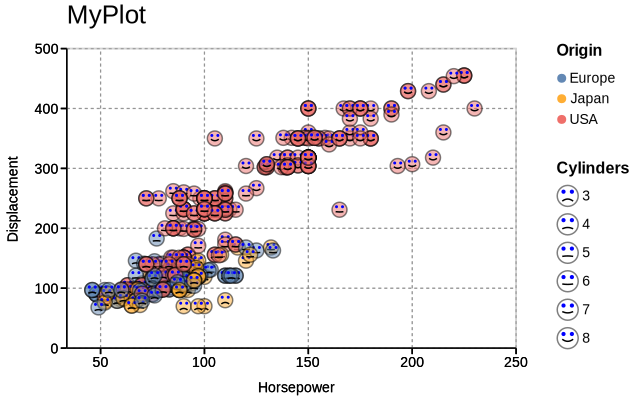

In [33]:
plt = Plot(
    title="MyPlot",
    data=df,
    x = (field = :Horsepower,),
    y = (field = :Displacement,),
    color = (field = :Origin, colorscheme=:tableau_superfishel_stone),
    smile = (field = :Cylinders, scale_range=(-1,1), legend=(fmark=x->Face(size=7,smile=x),)),
    graphic = ∑() do row
        T(row[:x],row[:y])U(5)Face(headstyle=S(:fill=>row[:color]),smile=row[:smile])
    end
)


draw(plt, height=400)

When a user defines a new encoder, such as `smile`, by default, no legend will be drawn. If the user wants a legend,
it is possible to specify an `fmark` function, which takes the values encoded and draws a mark.
Another option is for users to draw the legends as a separate diagram, and incorporate it into the plot.

In the example above, we have used the `fmark` option. Let us now create a new customized legend.

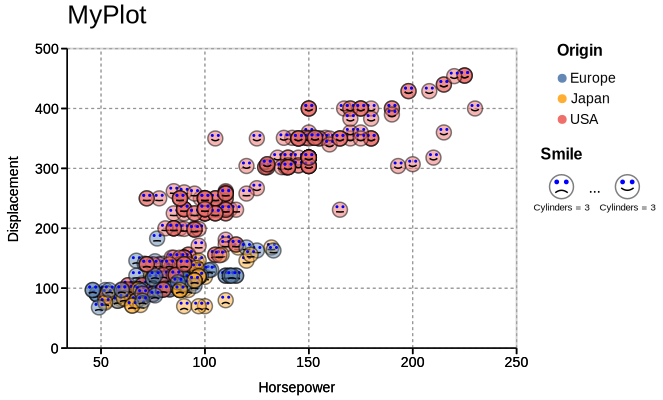

In [34]:
plt = Plot(
    title="MyPlot",
    data=df,
    encodings=(
        x = (field = :Horsepower,),
        y = (field = :Displacement,),
        color = (field = :Origin, colorscheme=:tableau_superfishel_stone),
        smile = (field = :Cylinders, scale_range=(-1,1)),
    ),
    graphic = ∑() do row
        T(row[:x],row[:y])U(5)Face(headstyle=S(:fill=>row[:color]),smile=row[:smile])
    end
)


legend_title = S(:fontWeight => "bold")TextMark(fontfamily="Helvetica",text="Smile",fontsize=8) 
legend_marks = 
        Face(smile=-1) ↓
        (T(0,-0.4),TextMark(text="Cylinders = 3",fontsize=0.6)) →
        (T(2,0),TextMark(text="...",fontsize=1)) →
        (T(2,0),Face(smile=1) ↓
        (T(0,-0.4),TextMark(text="Cylinders = 3",fontsize=0.6)))
legend = legend_title ↓ (T(0,-10),U(8)legend_marks)

draw(plt + T(plt.config.figsize[1]+30,130)legend, height=400)

## 2. Frames and Axes

Using the `config` in the graphic specification, users can thoroughly customize the frame and axes of plots.

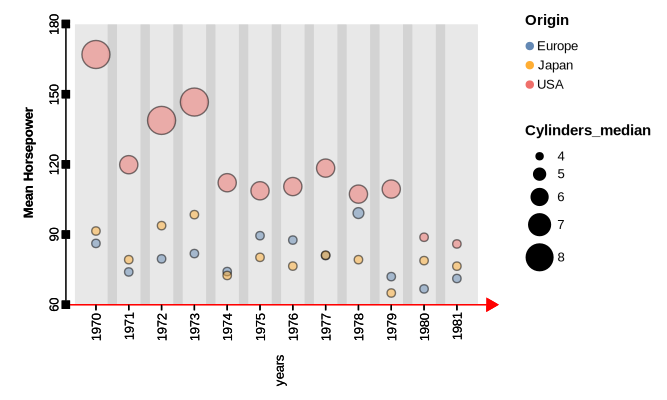

In [35]:
gdf = combine(groupby(df,[:Year,:Origin]),:Horsepower=>mean,:Miles_per_Gallon=>mean,:Cylinders=>median)

gdf = sort(gdf,:Year)

plt = Plot(
    config=(
            frame_style=S(:stroke=>:white),
            xgrid = (;style=S(:strokeWidth=>30,:strokeOpacity=>0.05)),
            xaxis=(
                    title="years",
                    titleangle=π/2,
                    titlefontsize=8,
                    ticktextangle=π/2,
                    ticktexts=collect(1970:1982),
                    axisarrow=S(:stroke=>:red,:fill=>:red)Arrow(pts=[[0,0],[300,0]],headsize=5),
            ),
            ygrid=NilD(),
            yaxis=(
                    title=TextMark(text="Mean Horsepower",fontsize=7,style= S(:fontWeight=>:bold), angle=π/2),
                    ticktextangle=π/2,
                    tickmark=T(2,0)Square(l=6),
            ),
        ),
    data = gdf,
    encodings=(
        x=(field=:Year,),
        y=(field=:Horsepower_mean,),
        color=(field=:Origin,),
        size = (field = :Cylinders_median,),
    ),
    graphic = S(:opacity=>0.5,:stroke=>:black)Circle()
)


draw(plt,height=400,pad=30)

## 3. Titles

At last, we have the title of a plot. The simplest way to customize a title
is to omit is from the graphic specification, and instead join it to the plot using the diagram opeartions.

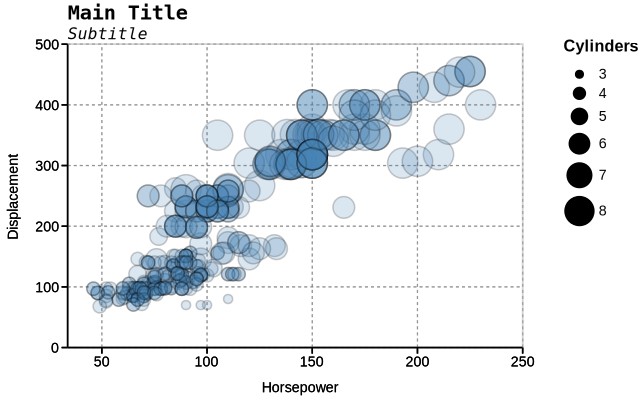

In [36]:
plt = Plot(
    data=df,
    encodings=(
        x = (field = :Horsepower,),
        y = (field = :Displacement,),
        size = (field = :Cylinders,),
    ),
    graphic = S(:fill=>:steelblue,:opacity=>0.2,:stroke=>:black)Circle()
)

maintitle = S(:fontWeight=>:bold)TextMark(text="Main Title", anchor=:e,fontfamily="monospace")
subtitle = S(:fontStyle=>:italic)TextMark(text="Subtitle", anchor=:e, fontsize=8,fontfamily="monospace")

title = maintitle ↓ (T(0,-5),subtitle)

d = plt ↑ title

draw(d, height=400)